## Graficos Trifásicos

> Bibliografía Python / Jupyter:
- https://codesolid.com/creating-a-python-interactive-plot/
- https://www.markdownguide.org/basic-syntax/
 

In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import math 
from ipywidgets import *
from math import pi

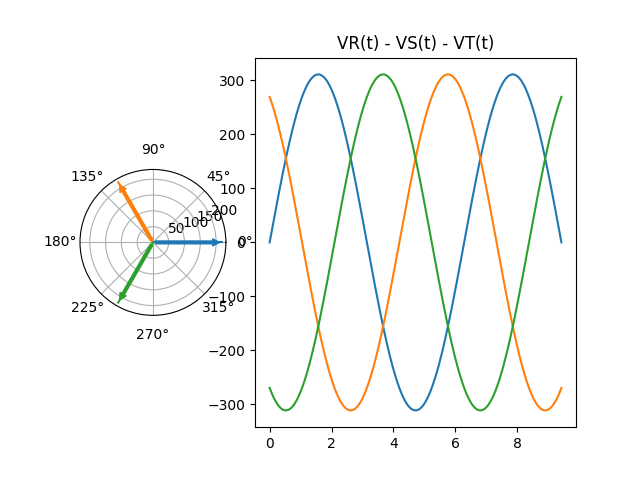

In [2]:
# Genera graficos fasoriales y temporales RST
# [[Angulo punto de inicio, Angulo punto final], [Radio punto de inicio, Radio punto final]]

FasorR = [np.deg2rad([0, 0]),[0,220]]
FasorS = [np.deg2rad([0, 120]),[0,220]]
FasorT = [np.deg2rad([0, 240]),[0,220]]

def dibuja_vector(vector, labels, plotA):    
    line = plotA.plot(vector[0],vector[1], label=labels)[0]
  
    line.axes.annotate('',          #Dibuja Flechas
        xytext=(0, 0),
        xy=(vector[0][1], vector[1][1]),       
        arrowprops=dict(color=line.get_color(), arrowstyle="simple"),
        size=10
    )


#Plot 1: Diagrama Fasorial
plot1 = plt.subplot2grid((1, 3), (0, 0), colspan=1,polar=True)
line_1 = dibuja_vector(FasorR, "VR", plot1)
line_2 = dibuja_vector(FasorS, "VS", plot1)
line_3 = dibuja_vector(FasorT, "VT", plot1)




#Plot 2: Diagrama Temporal
plot2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
deg = np.linspace(0, 3 * np.pi, 400)
FaseR = math.sqrt(2)*FasorR[1][1]*np.sin(deg+FasorR[0][1])
FaseS = math.sqrt(2)*FasorS[1][1]*np.sin(deg+FasorS[0][1])
FaseT = math.sqrt(2)*FasorT[1][1]*np.sin(deg+FasorT[0][1])
plot2.plot(deg, FaseR)
plot2.plot(deg, FaseS)
plot2.plot(deg, FaseT)
plot2.set_title('VR(t) - VS(t) - VT(t)')
 
plt.show()




interactive(children=(IntSlider(value=0, description='tiempo', max=495, step=5), Output()), _dom_classes=('wid…

C:\Users\Laptop\AppData\Local\Temp\ipykernel_22712\1840414218.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot1 = plt.subplot2grid((1, 3), (0, 0), colspan=1,polar=True)
C:\Users\Laptop\AppData\Local\Temp\ipykernel_22712\1840414218.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)


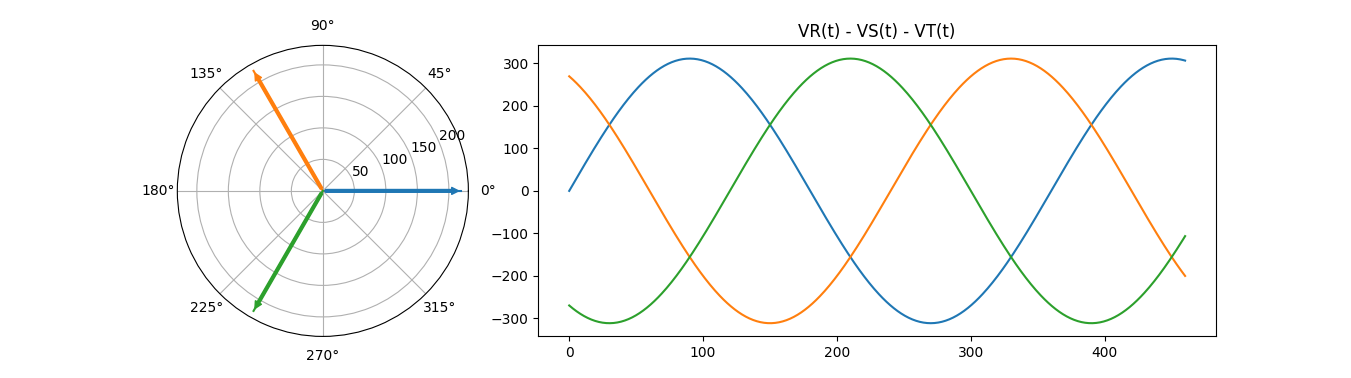

In [17]:
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets

tiempo = 0


#Cuando se mueve el slider redibuja los graficos
def handle_event(tiempo):
    plot1.set_theta_offset(np.deg2rad(tiempo))
    plot2.cla()
    plot2.plot(deg, FaseR)
    plot2.plot(deg, FaseS)
    plot2.plot(deg, FaseT)
    plot2.scatter(tiempo, FaseR[tiempo], c="red",zorder=2)
    plot2.scatter(tiempo, FaseS[tiempo], c="red",zorder=2)
    plot2.scatter(tiempo, FaseT[tiempo], c="red",zorder=2)
    plt.axvline(x = tiempo, color = 'b', label = 'axvline - full height')
    plt.draw()
    plt.legend()
    
def slider_config(value):
    """Return an IntSlider widget with the common configuration"""
    return widgets.IntSlider(min=0, max=495, step=5, value=value)


slider_controls = interactive(handle_event, tiempo = slider_config(tiempo))
display(slider_controls)

#Plot 1: Diagrama Fasorial
plot1 = plt.subplot2grid((1, 3), (0, 0), colspan=1,polar=True)
line_1 = dibuja_vector(FasorR, "VR", plot1)
line_2 = dibuja_vector(FasorS, "VS", plot1)
line_3 = dibuja_vector(FasorT, "VT", plot1)


#Plot 2: Diagrama Temporal
plot2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
deg = np.linspace(0, 460, 500)
FaseR = math.sqrt(2)*FasorR[1][1]*np.sin(np.deg2rad(deg)+FasorR[0][1])
FaseS = math.sqrt(2)*FasorS[1][1]*np.sin(np.deg2rad(deg)+FasorS[0][1])
FaseT = math.sqrt(2)*FasorT[1][1]*np.sin(np.deg2rad(deg)+FasorT[0][1])
plot2.plot(deg, FaseR)
plot2.plot(deg, FaseS)
plot2.plot(deg, FaseT)
plot2.set_title('VR(t) - VS(t) - VT(t)')
 
plt.show()